In [60]:
# A script file to merge a few csv files with some data column clean ups
# Dependencies
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# read in csv file for title lis
movie_csv = "../data_files/final.csv"

In [4]:
# read in csv file for title list
movie_df = pd.read_csv(movie_csv)
movie_df.head()


,Released,Title,Source,Production Budget,Opening Weekend Revenue,Domestic Box Office,Infl. Adj. Dom. Box Office,International Box Office,Worldwide Box Office,ratings,...,nominations,trailer ids,max viewcount,Infl. Adj. Production Budget,Infl. Adj. International Box Office,Infl. Adj. Worldwide Box Office,Infl. Adj. Opening Weekend Revenue,Genre,release_year,release_month
0,2000-11-17 00:00:00+00:00,How the Grinch Stole Christmas,Based on Fiction Book/Short Story,123000000,55820330,260044825,438980791,85096578,345141403,"[{'Source': 'Internet Movie Database', 'Value'...",...,37.0,['myTaigPrbsg'],3226963.0,207635884,143651245,582632036,94230110,Family,2000,11
1,2000-12-22 00:00:00+00:00,Cast Away,Original Screenplay,85000000,28883406,233632142,384884272,193598374,427230516,"[{'Source': 'Internet Movie Database', 'Value'...",...,35.0,"['4olwbrY2kwE', 'yY9Nm4RF-K0']",598437.0,140028520,318932868,703817140,47582360,Adventure,2000,12
2,2000-05-24 00:00:00+00:00,Mission: Impossible II,Based on TV,120000000,57845297,215409889,364078672,334178627,549588516,"[{'Source': 'Internet Movie Database', 'Value'...",...,20.0,['vIpqpRuGrq4'],1171309.0,202820032,564817665,928896337,97768208,Adventure,2000,5
3,2000-05-05 00:00:00+00:00,Gladiator,Original Screenplay,103000000,34819017,187683805,317130387,270000000,457683805,"[{'Source': 'Internet Movie Database', 'Value'...",...,104.0,"['owK1qxDselE', 'AxQajgTyLcM']",2259163.0,174039682,456220527,773350914,58833889,Action,2000,5
4,2000-12-15 00:00:00+00:00,What Women Want,Original Screenplay,65000000,33614543,182805123,303565725,191300000,374105123,"[{'Source': 'Internet Movie Database', 'Value'...",...,8.0,['VFwHs7fEUNs'],1313029.0,107938835,317672296,621238021,55820225,Comedy,2000,12


In [56]:
sources=movie_df['Source']
source_gb = movie_df.groupby('Source')
sources.value_counts()

Original Screenplay                    854
Based on Fiction Book/Short Story      371
Remake                                 113
Based on Comic/Graphic Novel           105
Based on Real Life Events               91
Based on TV                             76
Based on Factual Book/Article           62
Based on Folk Tale/Legend/Fairytale     29
Based on Game                           21
Based on Play                           19
Spin-Off                                18
Based on Religious Text                  7
Based on Short Film                      7
Based on Musical or Opera                7
Based on Theme Park Ride                 7
Based on Toy                             6
Based on Movie                           2
Based on Web Series                      1
Name: Source, dtype: int64

In [6]:
movie_df.columns

Index(['Released', 'Title', 'Source', 'Production Budget',
       'Opening Weekend Revenue', 'Domestic Box Office',
       'Infl. Adj. Dom. Box Office', 'International Box Office',
       'Worldwide Box Office', 'ratings', 'awards', 'rated', 'runtime',
       'genere', 'metascore', 'imdbRating', 'imdbVotes', 'imdbID',
       'nominations', 'trailer ids', 'max viewcount',
       'Infl. Adj. Production Budget', 'Infl. Adj. International Box Office',
       'Infl. Adj. Worldwide Box Office', 'Infl. Adj. Opening Weekend Revenue',
       'Genre', 'release_year', 'release_month'],
      dtype='object')

In [47]:
dom_sort=movie_df.sort_values('Infl. Adj. Dom. Box Office',ascending=False)
world_sort=movie_df.sort_values('Infl. Adj. Worldwide Box Office',ascending=False)
movie_df['Return world adj']=movie_df['Infl. Adj. Worldwide Box Office']-movie_df['Infl. Adj. Production Budget']
movie_df['Return world per']=(movie_df['Infl. Adj. Worldwide Box Office']-movie_df['Infl. Adj. Production Budget'])/movie_df['Infl. Adj. Production Budget']
return_sort=movie_df.sort_values('Return world per',ascending=False)




array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027141603048>],
      dtype=object)

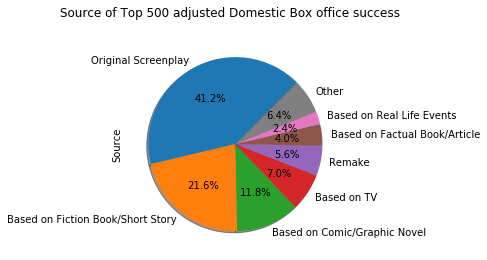

In [39]:
pie_series = dom_sort.iloc[0:500]['Source'].value_counts().loc[dom_sort.iloc[0:500]['Source'].value_counts() > 10]
pie_series['Other']=dom_sort.iloc[0:500]['Source'].value_counts().loc[dom_sort.iloc[0:500]['Source'].value_counts() < 10].sum()
pie_series.plot.pie(subplots=True, autopct="%1.1f%%", shadow=True, startangle=45, title='Source of Top 500 adjusted Domestic Box office success')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000271417063C8>],
      dtype=object)

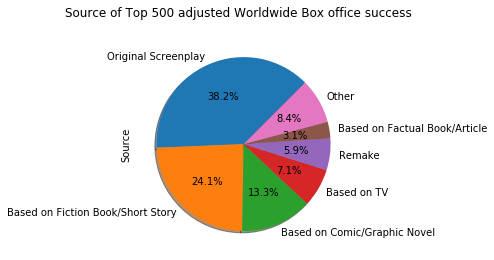

In [43]:
pie_series = world_sort.iloc[0:500]['Source'].value_counts().loc[world_sort.iloc[0:500]['Source'].value_counts() > 10]
pie_series['Other']=world_sort.iloc[0:500]['Source'].value_counts().loc[world_sort.iloc[0:500]['Source'].value_counts() < 10].sum()
pie_series.plot.pie(subplots=True, autopct="%1.1f%%", shadow=True, startangle=45, title='Source of Top 500 adjusted Worldwide Box office success')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027141238EC8>],
      dtype=object)

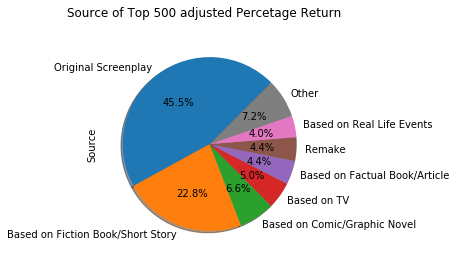

In [49]:
pie_series = return_sort.iloc[0:500]['Source'].value_counts().loc[return_sort.iloc[0:500]['Source'].value_counts() > 10]
pie_series['Other']=return_sort.iloc[0:500]['Source'].value_counts().loc[return_sort.iloc[0:500]['Source'].value_counts() < 10].sum()
pie_series.plot.pie(subplots=True, autopct="%1.1f%%", shadow=True, startangle=45, title='Source of Top 500 adjusted Percetage Return')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027145E143C8>],
      dtype=object)

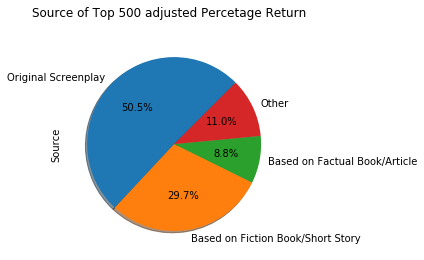

In [103]:
pie_series = return_sort.iloc[0:100]['Source'].value_counts().loc[return_sort.iloc[0:100]['Source'].value_counts() > 3]
pie_series['Other']=return_sort.iloc[0:100]['Source'].value_counts().loc[return_sort.iloc[0:100]['Source'].value_counts() < 3].sum()
pie_series.plot.pie(subplots=True, autopct="%1.1f%%", shadow=True, startangle=45, title='Source of Top 500 adjusted Percetage Return')

Text(0, 0.5, 'Number of Data points')

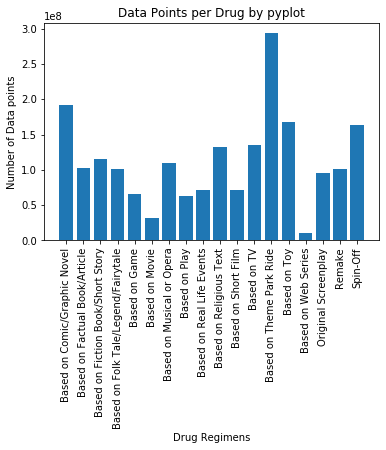

In [77]:
y=source_gb['Infl. Adj. Dom. Box Office'].mean()
x=source_gb['Infl. Adj. Dom. Box Office'].count()

fig_bar, ax_bar = plt.subplots()
ax_bar.bar(source_gb.groups.keys(), y)
# Aesthetics adjustments to match the previous graph
plt.xticks(rotation=90)
ax_bar.set_title("Data Points per Drug by pyplot")
ax_bar.set_xlabel("Drug Regimens")
ax_bar.set_ylabel("Number of Data points")


Text(0, 0.5, 'Number of Data points')

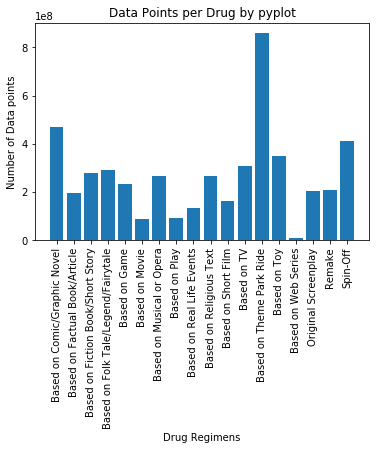

In [78]:
y=source_gb['Infl. Adj. Worldwide Box Office'].mean()
x=source_gb['Infl. Adj. Dom. Box Office'].count()

fig_bar, ax_bar = plt.subplots()
ax_bar.bar(source_gb.groups.keys(), y)
# Aesthetics adjustments to match the previous graph
plt.xticks(rotation=90)
ax_bar.set_title("Data Points per Drug by pyplot")
ax_bar.set_xlabel("Drug Regimens")
ax_bar.set_ylabel("Number of Data points")

0       1.806028
1       4.026241
2       3.579904
3       3.443532
4       4.755463
          ...   
1795   -0.597525
1796   -0.429273
1797   -0.882762
1798   -0.450620
1799   -0.767081
Name: Return world per, Length: 1800, dtype: float64

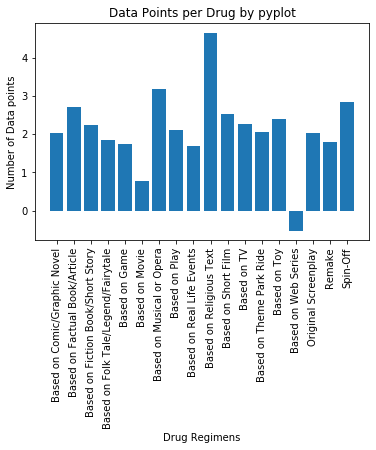

In [82]:

y=source_gb['Return world per'].mean()
x=source_gb['Infl. Adj. Dom. Box Office'].count()

fig_bar, ax_bar = plt.subplots()
ax_bar.bar(source_gb.groups.keys(), y)
# Aesthetics adjustments to match the previous graph
plt.xticks(rotation=90)
ax_bar.set_title("Data Points per Drug by pyplot")
ax_bar.set_xlabel("Drug Regimens")
ax_bar.set_ylabel("Number of Data points")
movie_df['Return world per']

In [83]:
movie_df['Source'].value_counts()

Original Screenplay                    854
Based on Fiction Book/Short Story      371
Remake                                 113
Based on Comic/Graphic Novel           105
Based on Real Life Events               91
Based on TV                             76
Based on Factual Book/Article           62
Based on Folk Tale/Legend/Fairytale     29
Based on Game                           21
Based on Play                           19
Spin-Off                                18
Based on Religious Text                  7
Based on Short Film                      7
Based on Musical or Opera                7
Based on Theme Park Ride                 7
Based on Toy                             6
Based on Movie                           2
Based on Web Series                      1
Name: Source, dtype: int64

In [93]:
y=source_gb['Infl. Adj. Worldwide Box Office'].mean()
# source_gb.groups.keys()
y
a=movie_df['Source'].value_counts()>10

In [101]:
movie_df['Source'].value_counts().loc[a]

Original Screenplay                    854
Based on Fiction Book/Short Story      371
Remake                                 113
Based on Comic/Graphic Novel           105
Based on Real Life Events               91
Based on TV                             76
Based on Factual Book/Article           62
Based on Folk Tale/Legend/Fairytale     29
Based on Game                           21
Based on Play                           19
Spin-Off                                18
Name: Source, dtype: int64

In [98]:
a

Original Screenplay                     True
Based on Fiction Book/Short Story       True
Remake                                  True
Based on Comic/Graphic Novel            True
Based on Real Life Events               True
Based on TV                             True
Based on Factual Book/Article           True
Based on Folk Tale/Legend/Fairytale     True
Based on Game                           True
Based on Play                           True
Spin-Off                                True
Based on Religious Text                False
Based on Short Film                    False
Based on Musical or Opera              False
Based on Theme Park Ride               False
Based on Toy                           False
Based on Movie                         False
Based on Web Series                    False
Name: Source, dtype: bool

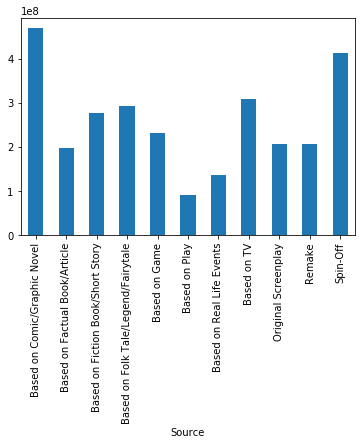

In [106]:
y.loc[a].plot.bar()